<a href="https://colab.research.google.com/github/evanjones125/fastai-fun/blob/main/is_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import fastai library

In [ ]:
!pip install -Uqq fastai duckduckgo_search

Create function to scrape images from a search engine

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *
from fastai.data.transforms import get_image_files
from fastai.vision.utils import download_images, resize_images
import time

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

Find 30 examples of both cats and rotisserie chickens

In [ ]:
searches = 'photo of a cat','rotisserie chicken'
path = Path('cat_or_chicken')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

Confirm cat_or_chicken folder was created

In [ ]:
print(path)

Remove any photos that failed to download correctly

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

Form the training and validation sets

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=20)

Train the model

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(30)

Allow photo uploads to get feeback from what the model sees

Saving Screenshot 2022-11-14 at 8.03.25 PM.png to Screenshot 2022-11-14 at 8.03.25 PM (1).png


This is a: photo of a cat.
Probability it's a cat: 0.6942
Probability it's a rotisserie chicken: 0.3058


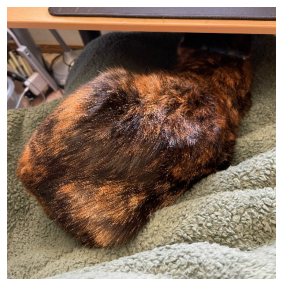

In [ ]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

cat_or_chicken,_,probs = learn.predict(img)
print(f"This is a: {cat_or_chicken}.")
print(f"Probability it's a cat: {probs[0]:.4f}")
print(f"Probability it's a rotisserie chicken: {probs[1]:.4f}")